## House Price Prediction with Advance Regression Techniques

In [54]:
#import some necessary libraries
import numpy as np #linear algebra
import pandas as pd #data-preprocessing
import matplotlib.pyplot as plt
import seaborn as sns


import missingno as msno #geting missing values

import warnings 
warnings.filterwarnings('ignore')

In [55]:
#Now let's import and put the train and test datasets in  pandas dataframe

train_df=pd.read_csv('./train.csv')
test_df=pd.read_csv('./test.csv')

#check the numbers of samples and features in train and test dataset 
print('train has {} rows and {} columns'.format(train_df.shape[0],train_df.shape[1]))
print('test has  {} rows and {} columns'.format(test_df.shape[0],test_df.shape[1]))


train has 1460 rows and 81 columns
test has  1459 rows and 80 columns


In [56]:
#Disply First five records of train dataset
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [57]:
#Display First Five records of test dataset
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [58]:
#combine train set and test set to perfome same operations on both
all_data_df=pd.concat([train_df.drop('SalePrice', axis=1),test_df],axis=0)
print('shape of all_data without sales price {}'.format(all_data_df.shape))


shape of all_data without sales price (2919, 80)


In [59]:
#get more inormation about train dataset
all_data_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


### Data Preprocessing

- finding missing values

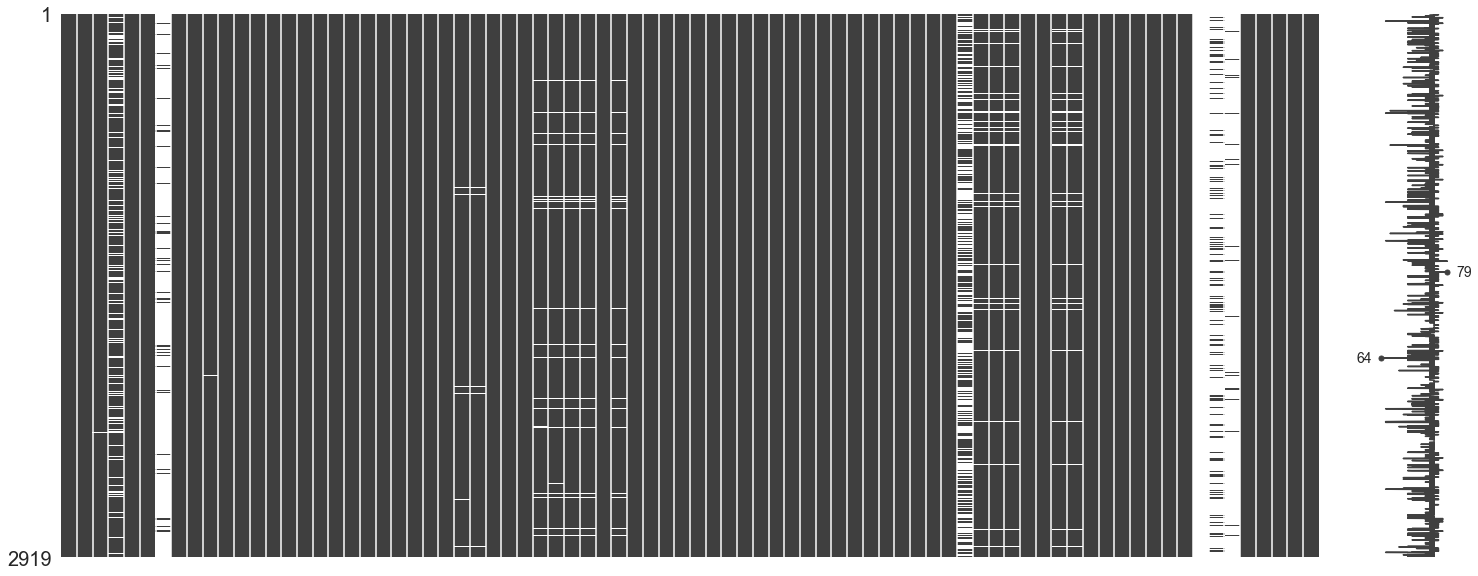

In [61]:
#null values with the help of heatmap 
#sns.heatmap(all_data_df.isnull())
msno.matrix(all_data_df);

In [62]:
#missing values with count and percentage
count=all_data_df.isnull().sum().sort_values(ascending=False)[
    all_data_df.isnull().sum().sort_values(ascending=False)!=0]
percent=round(all_data_df.isnull().sum().sort_values(ascending=False)
               /len(all_data_df)*100,2)[round(all_data_df.isnull().sum().sort_values(ascending=False)
               /len(all_data_df)*100,2)!=0]
missing_value_df=pd.concat([count,percent],axis=1)

#View missing df
missing_value_df

,0,1
PoolQC,2909,99.66
MiscFeature,2814,96.40
Alley,2721,93.22
Fence,2348,80.44
FireplaceQu,1420,48.65
LotFrontage,486,16.65
GarageCond,159,5.45
GarageQual,159,5.45
GarageYrBlt,159,5.45
GarageFinish,159,5.45


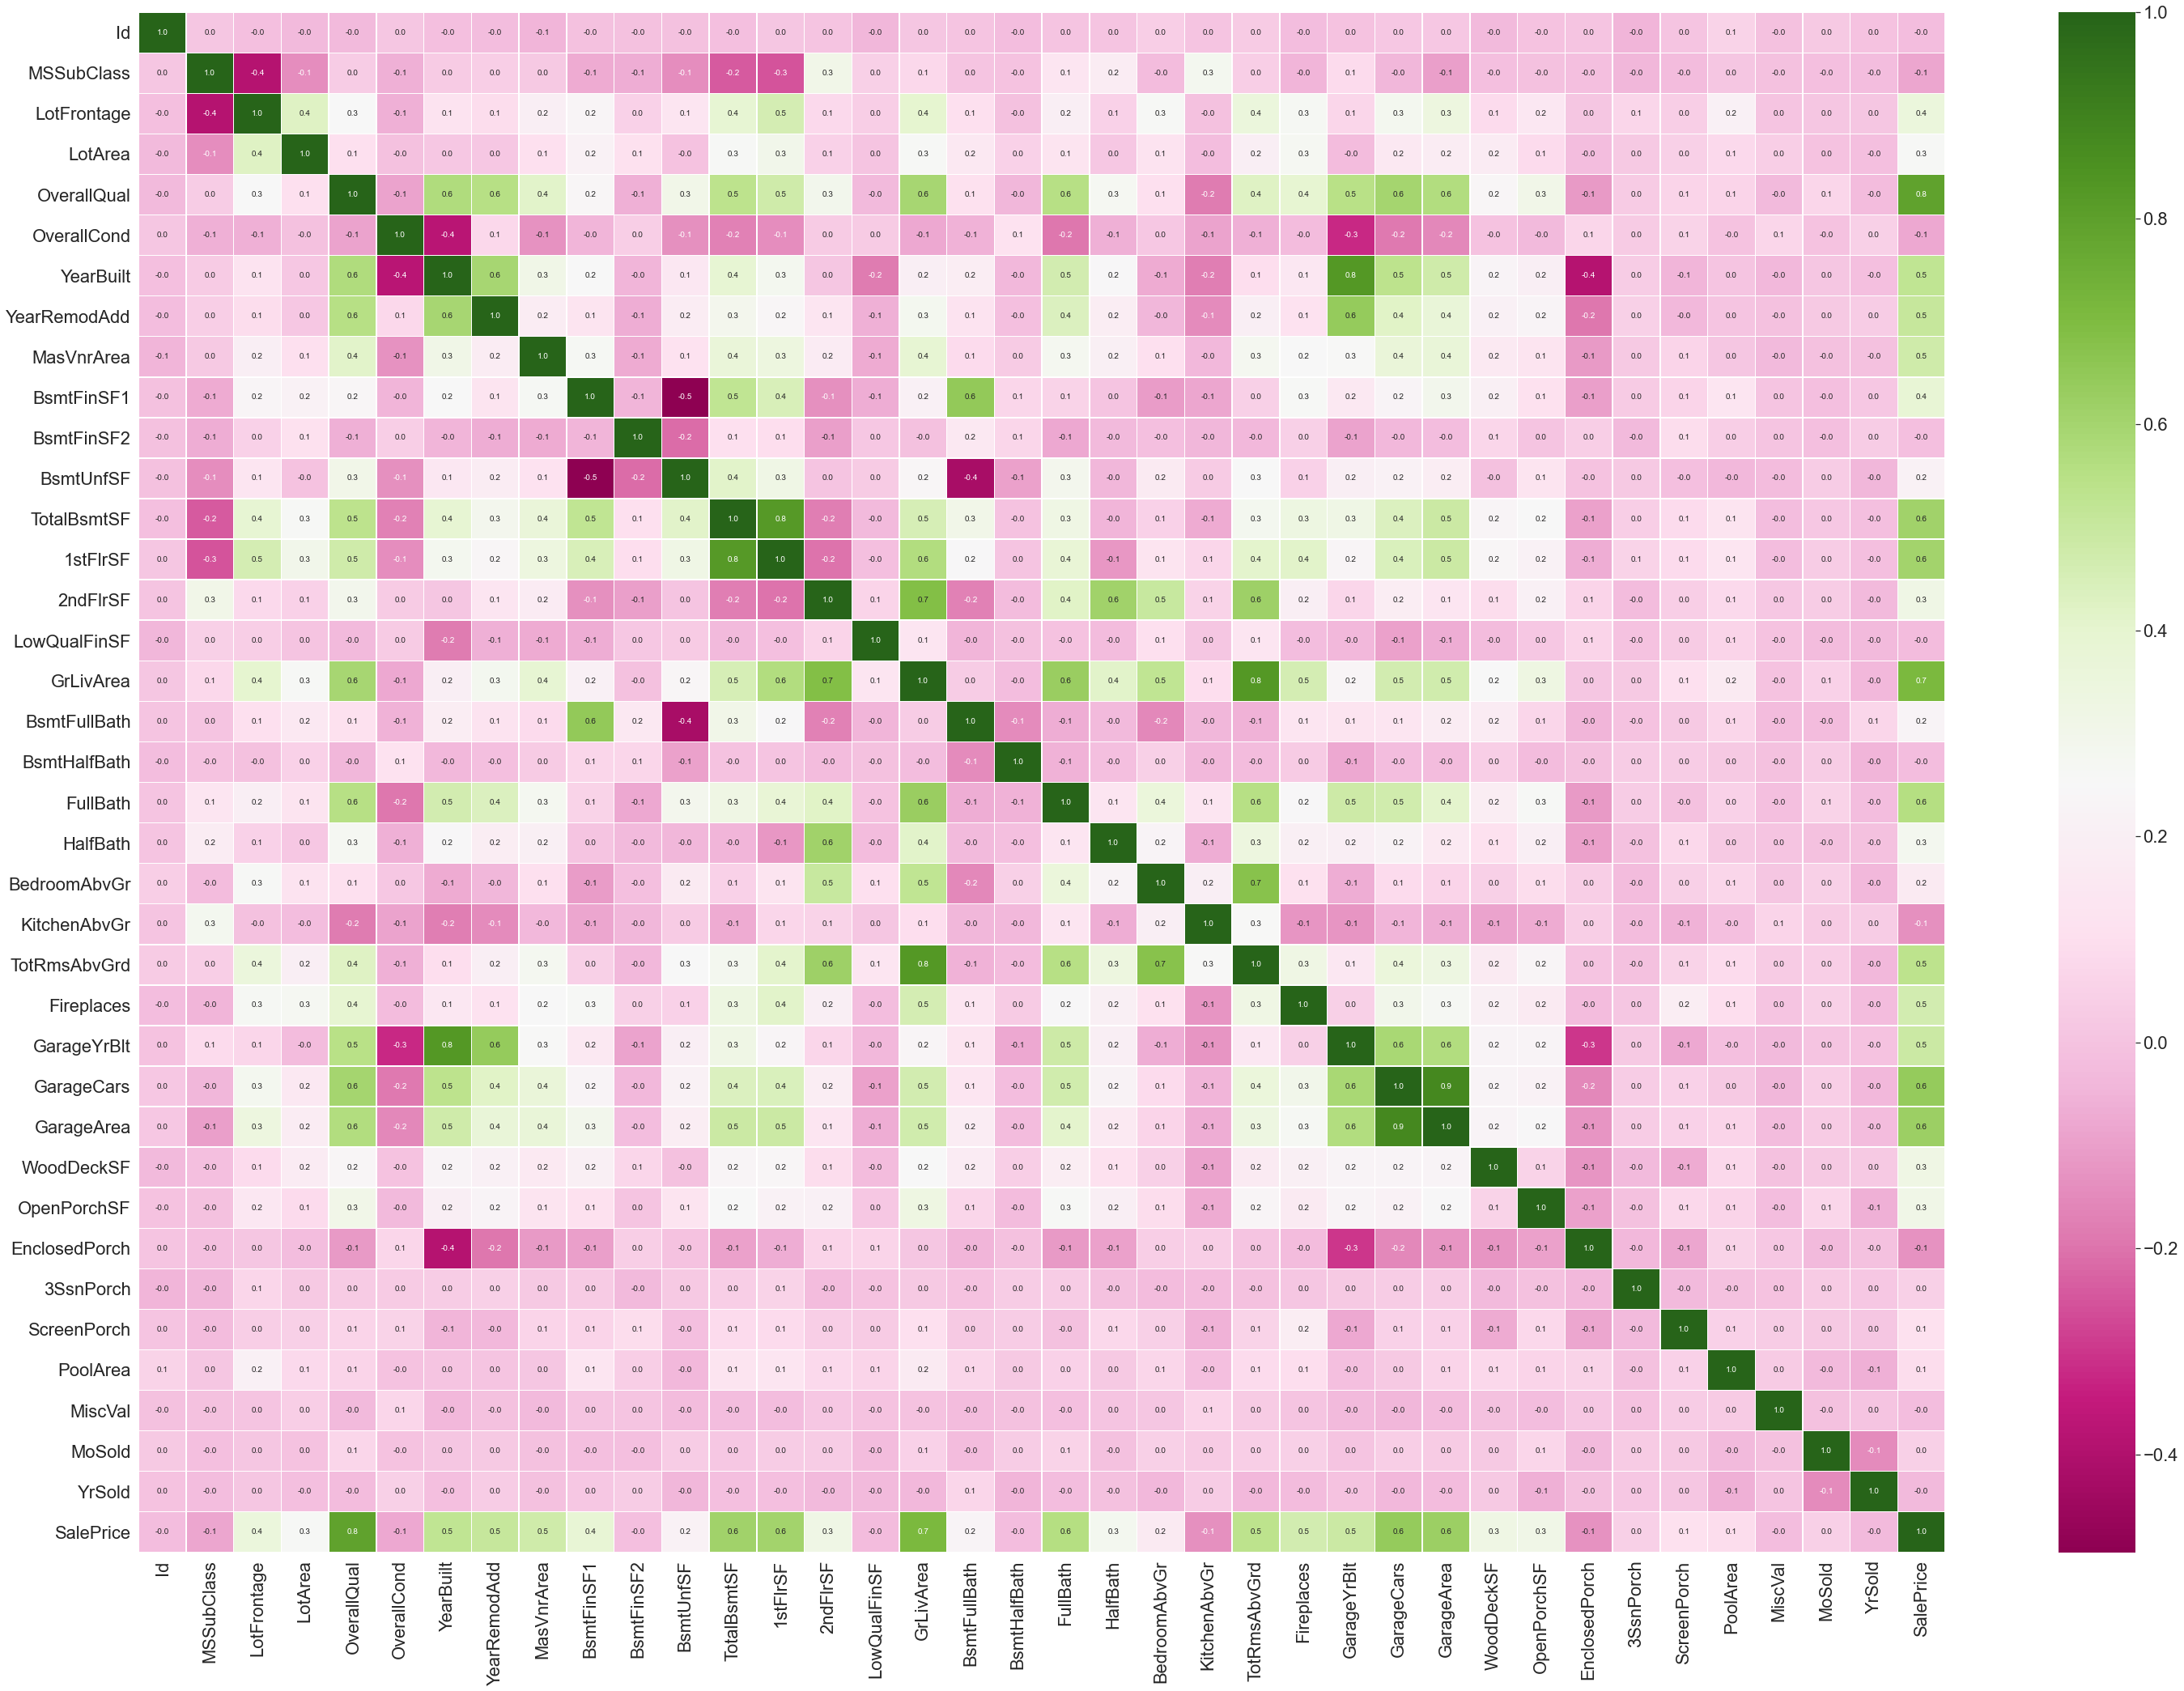

In [67]:
#view correlation between train_df features and sales price
sns.set(font_scale=2)
plt.figure(figsize=(50,35))
sns.heatmap(train_df.corr(),annot=True,annot_kws={'size':10},fmt='.1f',
           cmap='PiYG',linewidths=.5)

###  Target Value Analysis
SalePrice is the veriable we need to predict

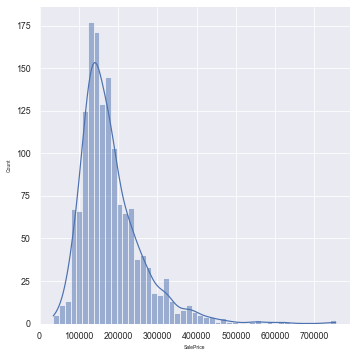

In [70]:
sns.set_context("paper", rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":5}) 
sns.displot(train_df['SalePrice'],kde=True)